In [1]:
from runner import *

plotpath = parent_directory + "\\plots\\"
plotting.set_dir(plotpath)

loading complete, calculating accuracy
getting human labeled boundaries
complete


### generate pre and post segmentation images

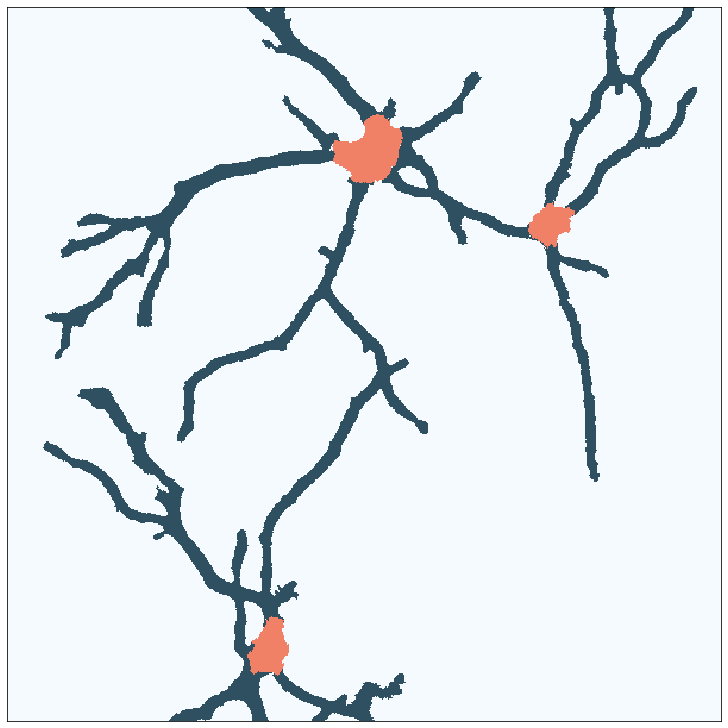

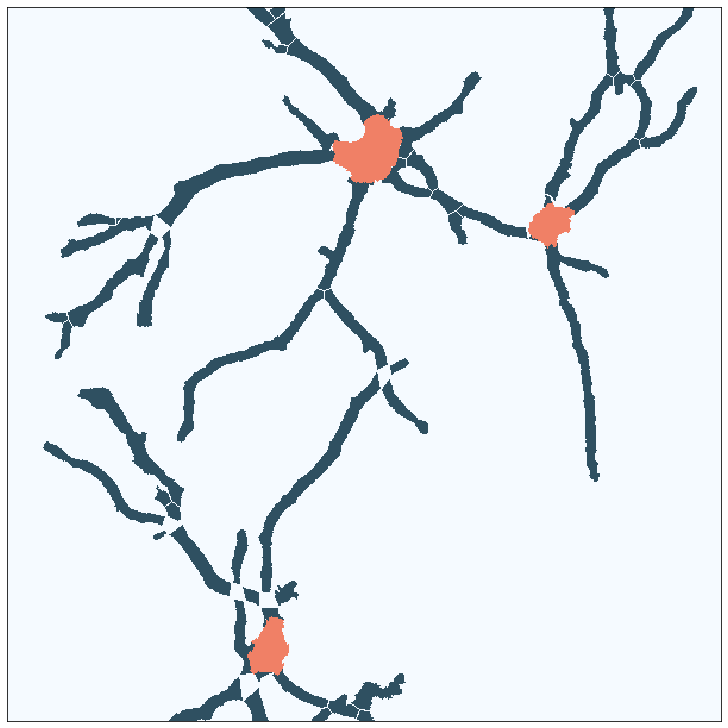

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [2]:
pre_segmentation_image = np.array((thresholdedProcessImage > 0) + 2 * (somaImage > 0), dtype=float)
post_segmentation_image = np.array((processImage > 0) + 2 * (somaImage > 0), dtype=float)
# total_image = np.array((humanProcessImage > 0) + 2*(humanBodyImage > 0), dtype=float)
# total_image = np.array((humanProcessImage > 0) + 2*(humanBodyImage > 0) - 1*((humanBodyImage > 0) * (humanProcessImage > 0)), dtype=float)

plotting.colorplot(plotting.panel(pre_segmentation_image, bbox, 1), two_map, interpolation="None",
                   name="presegmentationimage")
plotting.colorplot(plotting.panel(post_segmentation_image, bbox, 1), two_map, interpolation="None",
                   name="postsegmentationimage")
# plotting.implot(plotting.panel(processImage, bbox, 1), name="processImage", cmap=two_map_mapped, interpolation="None")
# plotting.implot(plotting.permute_image(plotting.panel(processImage, bbox, 1)), name="permuteProcessImage",
#                 cmap=two_map_mapped, interpolation="None")

### generate skeleton and crossing map

[  11   11   11 ... 4209 4209 4213]
[1423 1444 1707 ... 3096 3328 1771]
859 short branches found


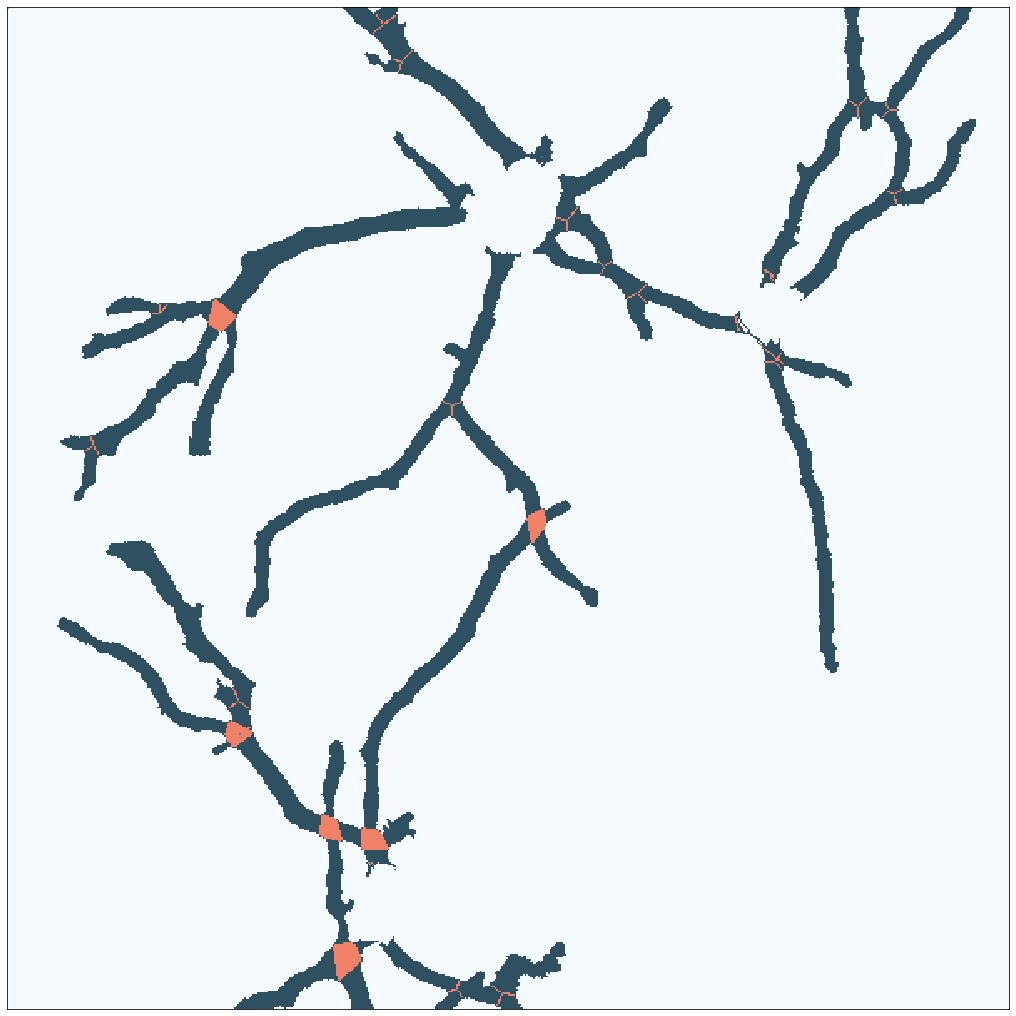

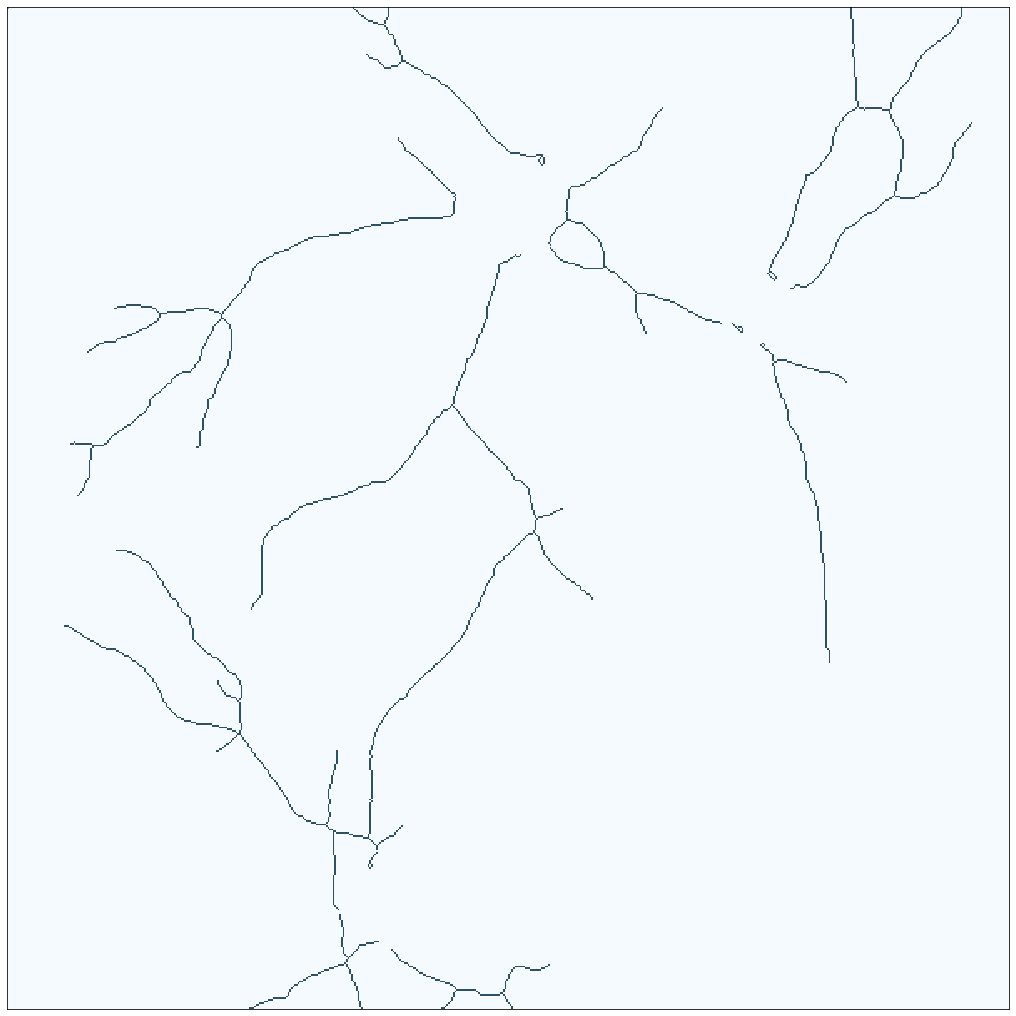

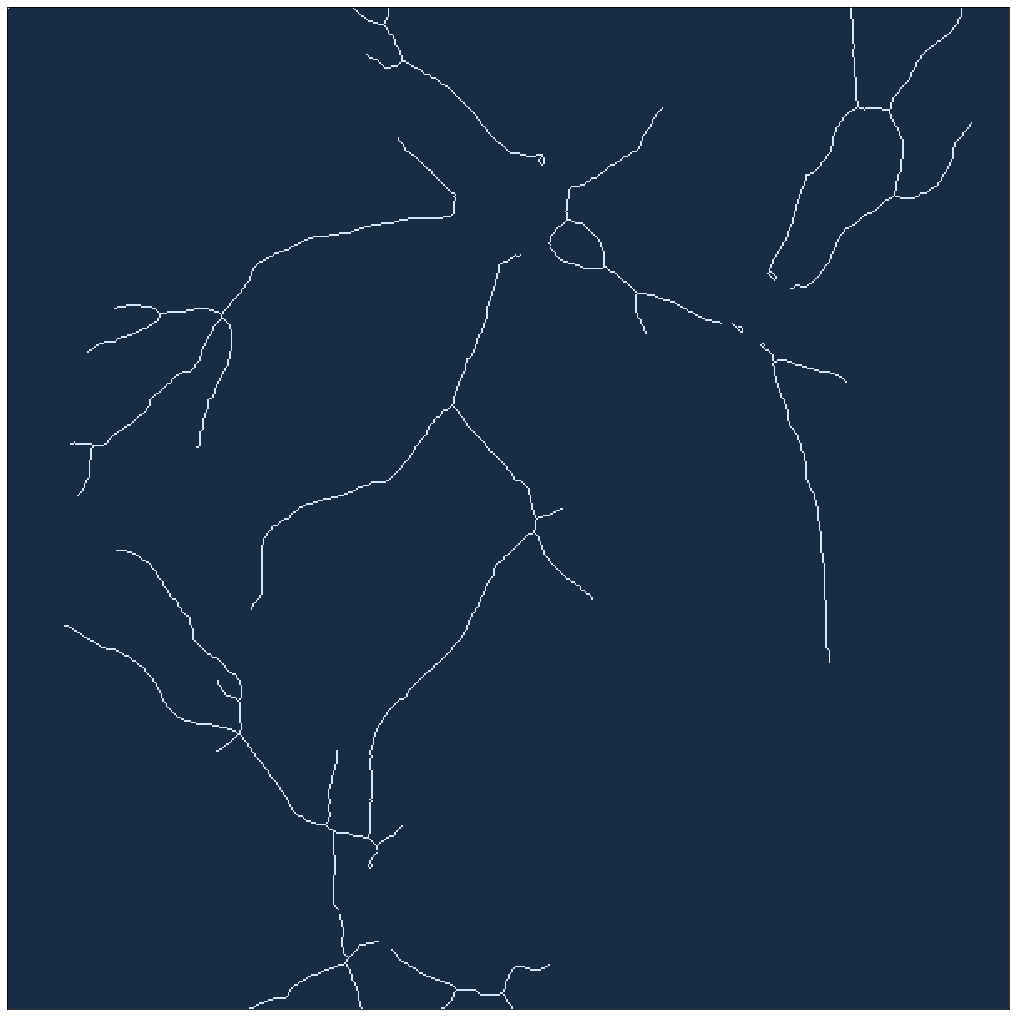

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

In [3]:
from segmentation import *

"""
break an image down into segments, applying crossing and branch masks
"""
sampleskel = skeletonize(thresholdedProcessImage, method="lee")
sampleskel = morphology.remove_small_objects(sampleskel > 0, min_size=15, connectivity=2)
shorts = rm_nubs(sampleskel, 10)

for short in shorts:
    for y, x in short:
        sampleskel[y, x] = 0

sep, sbp, scp = find_endpts(sampleskel)

a, b = cross_close_branches(sbp, scp, 10)

samplemask, cp_involved = get_crossing_mask(thresholdedProcessImage, nby2_convert(b))
bramchmask, bp_involved = get_branch_mask(thresholdedProcessImage, nby2_convert(a))
samplemask += bramchmask
samplemask[samplemask > 0] = 1


segmentedsampleimage = thresholdedProcessImage - samplemask
segmentedsampleimage[segmentedsampleimage < 1] = 0
segmentedsampleimage[segmentedsampleimage >= 1] = 1

plotting.colorplot(plotting.panel(thresholdedProcessImage + samplemask + a + 2 * b, bbox, 1), two_map,
                   interpolation="None", name="maskedProcessImage", figsize=(14, 14))
plotting.colorplot(plotting.panel(1 * (sampleskel > 0), bbox, 1), two_map, interpolation="None", name="skeleton",
                   figsize=(14, 14))
plotting.colorplot(plotting.panel(1 * (sampleskel > 0), bbox, 1), darktheme, interpolation="None", name="dark_skeleton",
                   figsize=(14, 14))

In [3]:
print(bp_involved)

[array([[  57, 1627],
       [  57, 1628],
       [  57, 1629],
       [  58, 1627],
       [  58, 1629],
       [  58, 1630],
       [  59, 1627],
       [  59, 1628],
       [  59, 1630],
       [  59, 1631],
       [  59, 1632],
       [  60, 1628],
       [  60, 1629],
       [  60, 1632],
       [  60, 1633],
       [  61, 1629],
       [  61, 1630],
       [  61, 1631],
       [  61, 1633],
       [  61, 1634],
       [  62, 1631],
       [  62, 1632],
       [  62, 1634],
       [  63, 1632],
       [  63, 1633],
       [  63, 1634]], dtype=int64), array([[  60, 1635],
       [  60, 1636],
       [  60, 1637],
       [  60, 1638],
       [  61, 1632],
       [  61, 1633],
       [  61, 1634],
       [  61, 1635],
       [  62, 1632],
       [  62, 1636],
       [  62, 1637],
       [  62, 1638],
       [  63, 1632],
       [  63, 1633],
       [  63, 1634],
       [  63, 1635],
       [  63, 1636]], dtype=int64), array([[  61, 1632],
       [  61, 1633],
       [  61, 1634],
   